# Exploratory Data Analysis

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import os
import gc

import re
from nltk.corpus import stopwords
import distance
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup

## 3.1 Reading data and basic stats

In [3]:
df = pd.read_csv('/Users/reetu/Documents/Personal_Projects/Quora/notebook/data/questions.csv')

print("Number of data points : ", df.shape[0])

Number of data points :  404351


In [4]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404351 entries, 0 to 404350
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404351 non-null  int64 
 1   qid1          404351 non-null  int64 
 2   qid2          404351 non-null  int64 
 3   question1     404350 non-null  object
 4   question2     404349 non-null  object
 5   is_duplicate  404351 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


### 3.2.1 Distribution of data points among output classes

Number of duplicate or non duplicate questions

<Axes: xlabel='is_duplicate'>

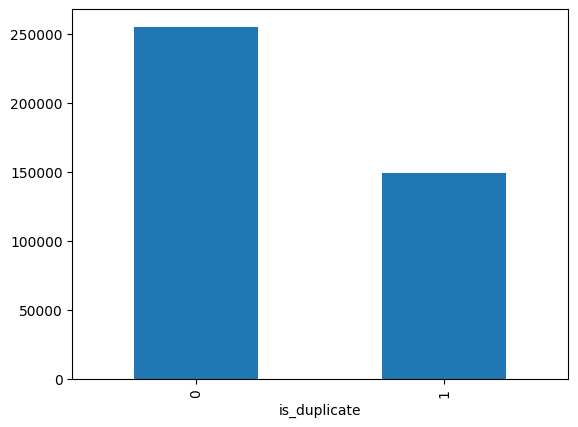

In [6]:
df.groupby("is_duplicate")['id'].count().plot.bar()

In [7]:
print('Total Number of question pairs for training : {}'.format(len(df)))

Total Number of question pairs for training : 404351


In [8]:
print("Question pairs are not similar (is_duplicate = 0):\n {}%".format(df['is_duplicate'].value_counts(normalize=True)[0] * 100))
print("Question pairs are similar (is_duplicate = 1):\n {}%".format(df['is_duplicate'].value_counts(normalize=True)[1] * 100))

Question pairs are not similar (is_duplicate = 0):
 63.07515005527375%
Question pairs are similar (is_duplicate = 1):
 36.92484994472624%


### 3.2.2 Number of unique questions

In [9]:
qids = pd.Series(df['qid1'].tolist() + df['qid2']. tolist())
unique_qs = len(np.unique(qids))
qs_morethan_oneline = np.sum(qids.value_counts() > 1)
print("Total number of unique questions are : {} \n".format(unique_qs))
print("Number of unique questions that appear more than one time: {}".format(qs_morethan_oneline))
max_repetitions = qids.value_counts().max()
print('Max number of times a single question is repeated: {}\n'.format(max_repetitions))


q_vals = qids.value_counts()
q_vals = q_vals.values


Total number of unique questions are : 789801 

Number of unique questions that appear more than one time: 13698
Max number of times a single question is repeated: 50



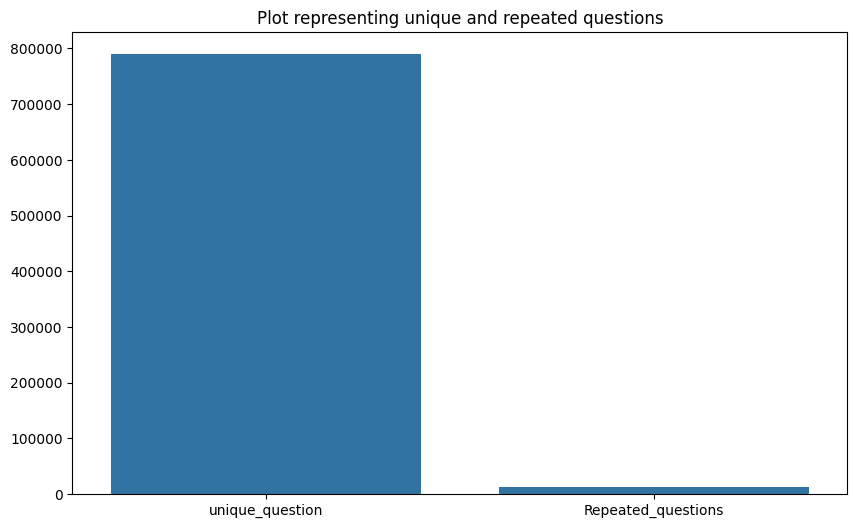

In [10]:
x = ["unique_question", "Repeated_questions"]
y = [unique_qs, qs_morethan_oneline]

plt.figure(figsize=(10,6))
plt.title("Plot representing unique and repeated questions")
sns.barplot(x=x,y=y)
plt.show()

### 3.2.3 Checking for duplicates

In [11]:
# Grouping by qid1 and qid2 to find pairs
pair_duplicates = df[['qid1', 'qid2', 'is_duplicate']].groupby(['qid1', 'qid2']).size()

# Calculate the number of duplicate question pairs
num_duplicates = df.shape[0] - pair_duplicates.shape[0]

# Printing the result
print("Number of duplicate questions: {}".format(num_duplicates))


Number of duplicate questions: 3


### 3.2.3 Number of occurences of each question

Maximum number of times a single question is repeated : 50



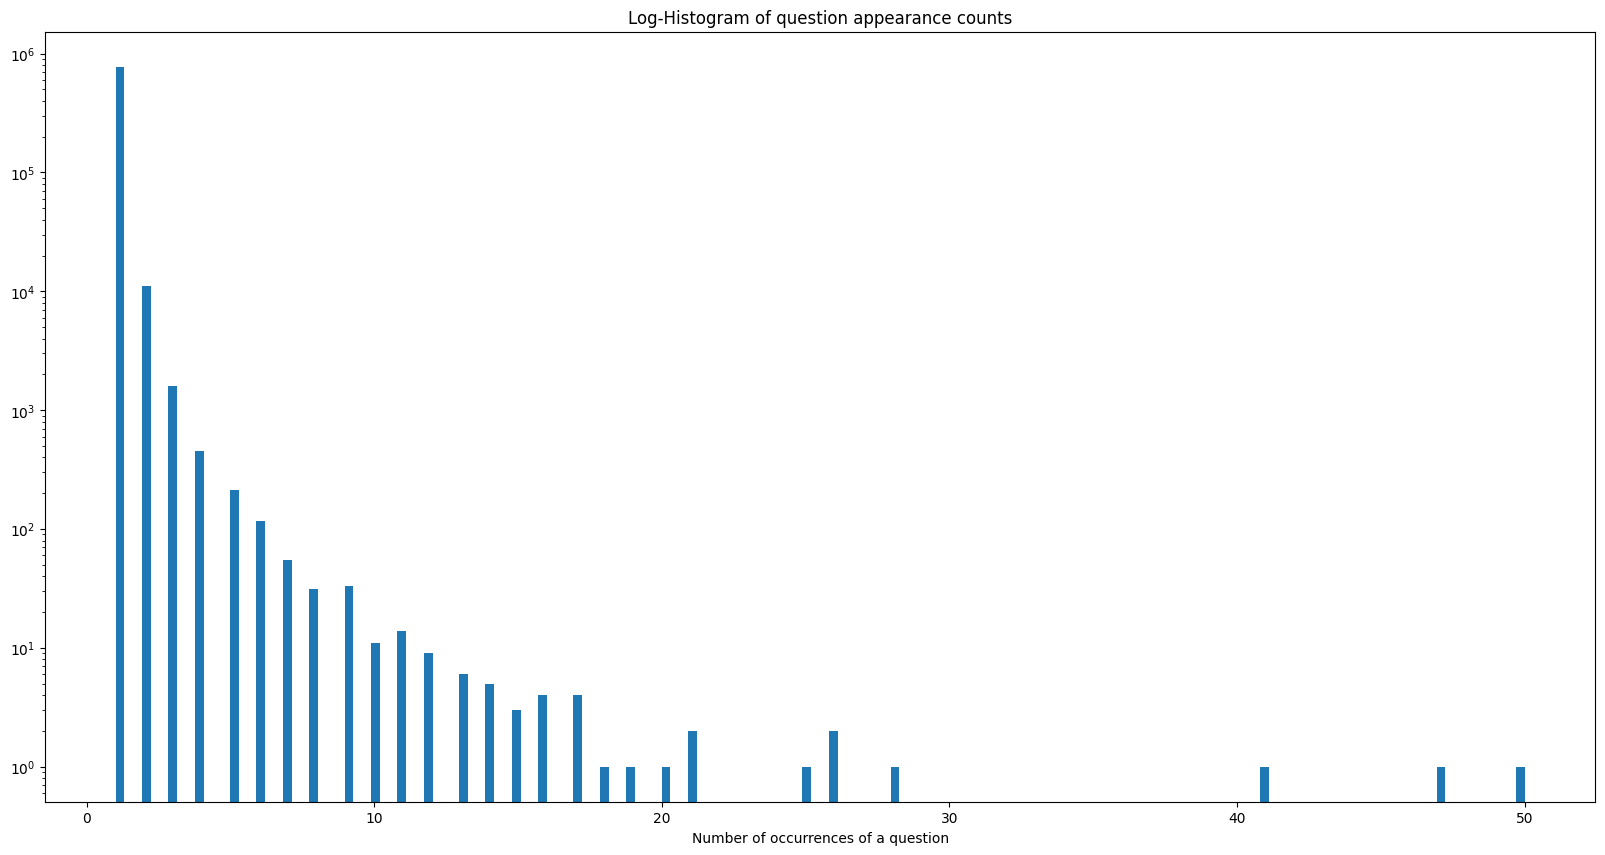

In [14]:
import numpy as np

plt.figure(figsize=(20,10))

# Plot the histogram
plt.hist(qids.value_counts(), bins=160)

# Set the y-scale to log, ensure no zero values
plt.yscale('log')

plt.title('Log-Histogram of question appearance counts')
plt.xlabel('Number of occurrences of a question')

# Display the maximum number of occurrences
print("Maximum number of times a single question is repeated : {}\n".format(qids.value_counts().max()))


### 3.25 Checking for Null values

In [16]:
#checking whether there are any rows with null values

nan_rows = df[df.isnull().any(axis = 1)]
print(nan_rows)

            id    qid1    qid2                         question1  \
105796  105796  209841  209842    How can I develop android app?   
201871  201871  398348  398349  How can I create an Android app?   
363416  363416  711434  711435                               NaN   

                                                question2  is_duplicate  
105796                                                NaN             0  
201871                                                NaN             0  
363416  My Chinese name is Haichao Yu. What English na...             0  


In [17]:
#filling the null values with " "
df = df.fillna('')
nan_rows = df[df.isnull().any(axis=1)]
print(nan_rows)

Empty DataFrame
Columns: [id, qid1, qid2, question1, question2, is_duplicate]
Index: []


### 3.3 Basic Feature Engineering